Vectors in 3D
> TBD

## Drawing 3D Vectors in Python

Vectors (and points) in the 3D space are represented by a tuple $ \vec{v} = (x, y, z) $.

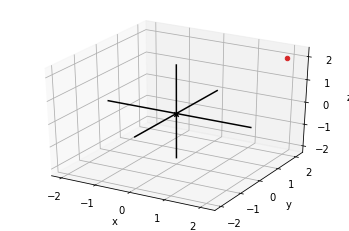

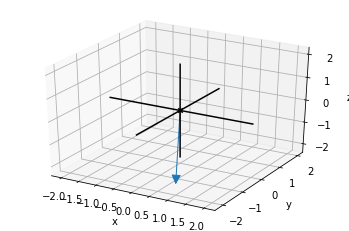

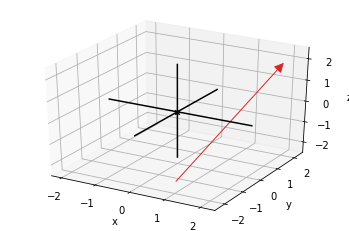

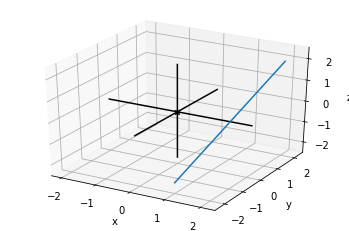

In [5]:
from draw3d import draw3d, Points3D, Arrow3D, Segment3D, red, blue

# single point
draw3d(
    Points3D((2, 2, 2), color=red)
)

# single vector, using default tail (0, 0, 0)
draw3d(
    Arrow3D((1, -2, -2), color=blue)
)

# single vector, using custom tail (1, -2, -2)
draw3d(
    Arrow3D((2, 2, 2), (1, -2, -2))
)

# segment
draw3d(
    Segment3D((2, 2, 2), (1, -2, -2))
)

Additionally, the `draw3d` library exposes a Box3D class that helps with the visualization.
`Box3D` represents a box with one corner at the origin and the opposite one at the given point.

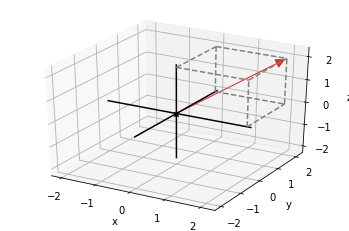

In [6]:
from draw3d import Box3D

draw3d(
    Box3D(2, 2, 2),
    Arrow3D((2, 2, 2))
)


## Vector Arithmetic in 3D

All of the arithmetic operations in 2D have analogies in 3D, and the geometric effects of those are similar in the 3D space.

### Adding 3D vectors

The vector addition can be accomplished by adding the Cartesian coordinates of the vectors. Also, the *tip-to-tail* geometric representation of the addition works in the 3D space.

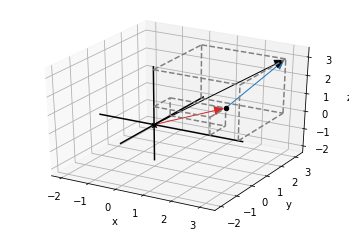

In [17]:
from draw3d import black

def add(*vectors):
    return (sum(v[0] for v in vectors), sum(v[1] for v in vectors), sum(v[2] for v in vectors))

sum_vector = add((2, 1, 1), (1, 2, 2))

draw3d(
    Points3D((2, 1, 1)),
    Arrow3D((2, 1, 1), color=red),
    Arrow3D(sum_vector, (2, 1, 1), color=blue),
    Arrow3D(sum_vector, color=black),
    Box3D(2, 1, 1),
    Box3D(*sum_vector)
)

Vector addition is commutative, and *tip-to-tail* can be applied as well when adding more than 2 vectors.

(7, 7, -3)


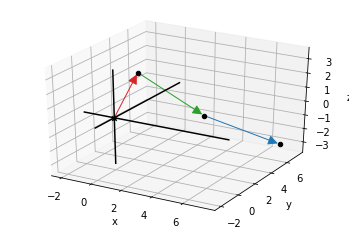

In [25]:
from draw3d import green

v1 = (1, 1, 3)
v2 = (2, 4, -4)
v3 = (4, 2, -2)

sum_vector = add(v1, v2, v3)

print(sum_vector)

draw3d(
    Arrow3D(v1, color = red),
    Arrow3D(add(v1, v2), v1, color=green), Points3D(v1),
    Arrow3D(add(v1, v2, v3), add(v1, v2), color=blue), Points3D(add(v1, v2)), Points3D(sum_vector)
)


We can write a generalized function for adding vectors that is both concise and efficient. This will work for 2D vectors, 3D vectors and even for vectors defined in spaces with more than 3 dimensions:

In [30]:
def add(*vectors):
    # this creates a list of tuples, with each tuple having all the x, y and z coordinates
    # e.g. zip((1, 2, 3), (4, 5, 6), (7, 8, 9)) = [(1, 4, 7), (2, 5, 8), (3, 6, 9)]
    by_coordinate = zip(*vectors) 

    # this creates a list with three elements, each one is the sum of the corresponding elements in the tuple
    # e.g. [sum(coords for coords in [(1, 4, 7), (2, 5, 8), (3, 6, 9)])] = [12, 15, 18]
    coordinate_sums = [sum(coords) for coords in by_coordinate]

    # finally, we transform the list into a tuple
    # e.g. [12, 15, 18] = (12, 15, 18)
    return tuple(coordinate_sums)

print(add((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


Note that there's even a way to write it more succinctly, at the cost of making it less readable:

In [32]:
def add_one_liner(*vectors):
    return tuple(map(sum, zip(*vectors)))

print(add_one_liner((1, 2, 3), (4, 5, 6), (7, 8, 9)))

(12, 15, 18)


### Scalar Multiplication in 3D